D:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9017 - loss: 0.3338 - val_accuracy: 0.9853 - val_loss: 0.0469
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9871 - val_loss: 0.0399
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9894 - loss: 0.0353 - val_accuracy: 0.9882 - val_loss: 0.0361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9915 - loss: 0.0252 - val_accuracy: 0.9894 - val_loss: 0.0333
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9944 - loss: 0.0179 - val_accuracy: 0.9901 - val_loss: 0.0319
313/313 - 1s - 5ms/step - accuracy: 0.9901 - loss: 0.0319

Test accuracy: 0.9901


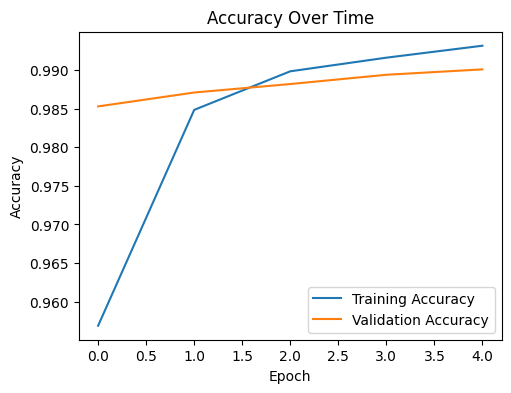

In [1]:
#此时numpy版本为1.26.4，tensorflow版本为2.5.0，numpy版本过高，导致tensorflow无法导入，需要降低numpy版本，与python3.11兼容
# from tensorflow import tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

# 加载 MNIST 数据集
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# 构建 CNN 模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# 绘制训练过程中的准确率
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')
plt.show()